# Introduction to OCaml Jupyter

ocaml-jupyter is an OCaml kernel for Jupyter. This provides a rich OCaml REPL interface on Jupyter.
markdown/HTML documentation, LaTeX formula by MathJax, and embedding images like figures and chars.

You can interactively execute OCaml programs in a *cell* (a textbox to input code):

In [14]:
let x = List.map (fun x -> x * 2) [1; 3; 5; 7; 9]

val x : int list = [2; 6; 10; 14; 18]


In [2]:
#require "jupyter.notebook" ;;

In [3]:
Jupyter_notebook.display "text/html" "<b>Hello, World!</b>"

Hello, World!

- : Jupyter_notebook.display_id = <abstr>


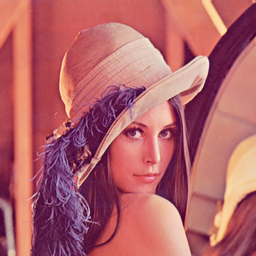

- : Jupyter_notebook.display_id = <abstr>


In [6]:
Jupyter_notebook.display_file ~base64:true "image/png" "datasets/lenna.png"

In [10]:
Jupyter_notebook.printf "<table><tr><th>Name</th><th>Age</th></tr>" ;
[
    "David", 29;
    "Smith", 35;
    "Rovert", 62;
]
|> List.iter (fun (name, age) -> Jupyter_notebook.printf "<tr><td>%s</td><td>%d</td></tr>" name age) ;
Jupyter_notebook.printf "</table>" ;
Jupyter_notebook.display_formatter "text/html"

Name Age David 29 Smith 35 Rovert 62

- : Jupyter_notebook.display_id = <abstr>


### Jupyter.archimedes
Archimedes is a 2D plotting library. OCaml Jupyter supports Archimedes charts in jupyter-archimedes sub-package. It can be installed by
```bash
$ opam install -y graphics jupyter-archimedes
```

In [11]:
#require "graphics" ;;
#require "jupyter-archimedes" ;;

Module Archimedes loaded and aliased as A.


This figure shows $y = sin(x)$ where $x \in [0, 10]$.

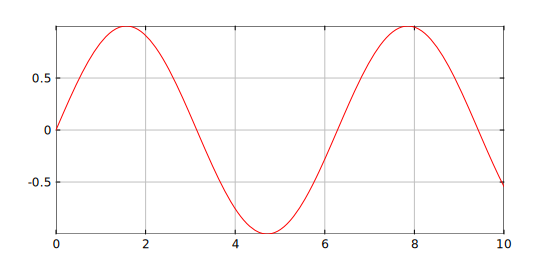

- : unit = ()


In [12]:
let vp = A.init ~w:560. ~h:260. ["jupyter"] in
A.Axes.box vp ;
A.set_color vp A.Color.red ;
A.fx vp sin 0.0 10.0 ;
A.close vp

We show a little complex example "random walk".

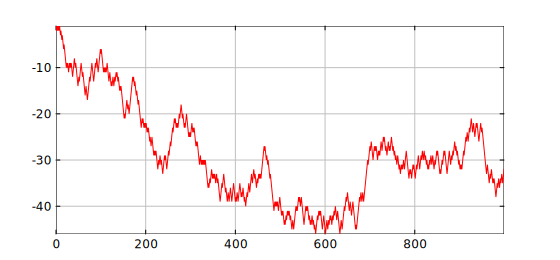

- : unit = ()


In [13]:
let rec walk acc p i =
    if i = 0 then List.rev acc else begin
        let q = if Random.bool () then succ p else pred p in
        walk (q :: acc) q (pred i)
    end in
let vp = A.init ~w:560. ~h:260. ["jupyter"] in
A.Axes.box vp ;
A.set_color vp A.Color.red ;
A.List.y vp ~style:`Lines (List.map float @@ walk [] 0 1000) ; (* Ploat a random walk of 1000 points. *)
A.close vp